In [107]:
#Big Mart Sales prediction
#dataset from analyticsvidhya

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Read files:
train = pd.read_csv("../../data/BigMart/Train_BigMart.csv")
test = pd.read_csv("../../data/BigMart/Test_BigMart.csv")

In [109]:
#combine train and test data together
train["source"]="train"
test["source"]="test"
data = pd.concat([train, test],ignore_index=True)

In [110]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train


In [111]:
#check Nan values
data.apply(lambda x: sum(x.isnull()))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [112]:
data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [113]:
data.dtypes

Item_Fat_Content              object
Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
Outlet_Location_Type          object
Outlet_Size                   object
Outlet_Type                   object
source                        object
dtype: object

In [114]:
# check categorical variables
for variable in ["Item_Fat_Content","Item_Type","Outlet_Location_Type","Outlet_Size","Outlet_Type"]:
    print (data[variable].value_counts())
    print ("--------------------")


Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
--------------------
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
--------------------
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64
--------------------
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64
--------------------
Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dty

In [115]:
# fill Missing Values
# columns Item_Weight Outlet_Size


In [116]:
avg_weight = data.groupby(["Item_Identifier"])["Item_Weight"].mean()
miss_bool = data['Item_Weight'].isnull() 
data.loc[miss_bool,'Item_Weight'] = data.loc[miss_bool,'Item_Identifier'].apply(lambda x: avg_weight[x])

In [117]:
outlet_size_mode=data.groupby(["Outlet_Type"])["Outlet_Size"].agg(pd.Series.mode)
miss_bool = data['Outlet_Size'].isnull() 
data.loc[miss_bool,'Outlet_Size'] = data.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [118]:
data.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                     0
Outlet_Type                     0
source                          0
dtype: int64

In [119]:
# EDA
train=data[data["source"]=="train"]

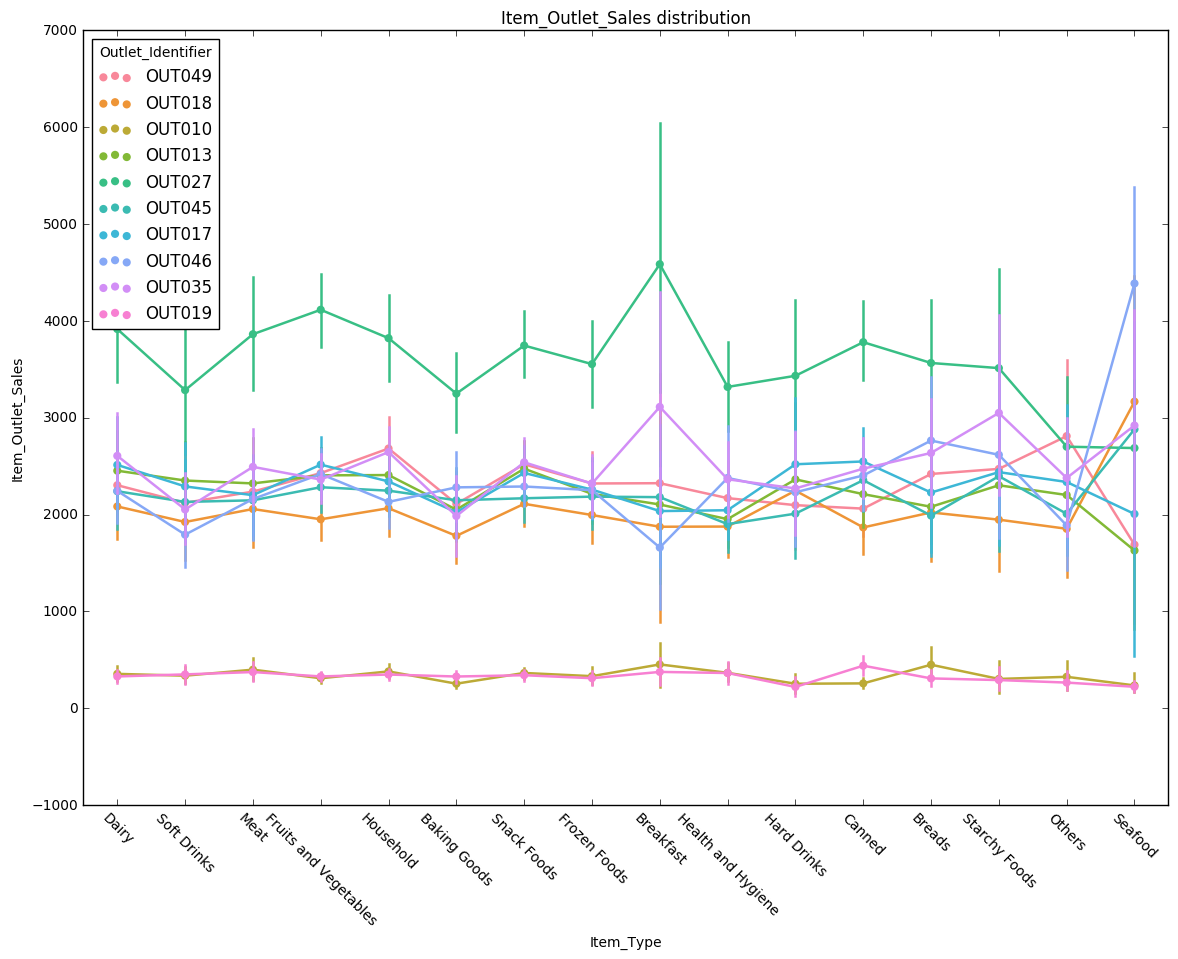

In [120]:
fig,ax = plt.subplots(figsize = (14, 10))
sns.pointplot(data=train[['Item_Type',
                           'Item_Outlet_Sales',
                           'Outlet_Identifier']],
             x='Item_Type',y='Item_Outlet_Sales',
             hue='Outlet_Identifier',ax=ax)
ax.set(title="Item_Outlet_Sales distribution")
ax.set_xticklabels(ax.get_xticklabels(), rotation=-45)

In [121]:
train.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,Small,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train


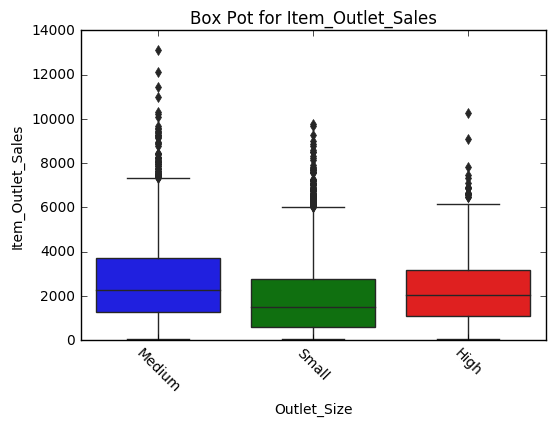

In [122]:
fig,ax = plt.subplots()
sns.boxplot(data=train[['Outlet_Size','Item_Outlet_Sales']],x="Outlet_Size",y="Item_Outlet_Sales",ax=ax)
ax.set(title="Box Pot for Item_Outlet_Sales")
ax.set_xticklabels(ax.get_xticklabels(), rotation=-45)

In [123]:
train.dtypes

Item_Fat_Content              object
Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
Outlet_Location_Type          object
Outlet_Size                   object
Outlet_Type                   object
source                        object
dtype: object

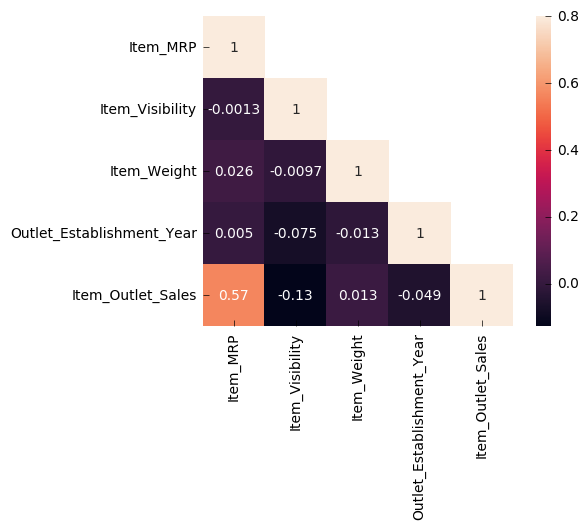

In [124]:
# correlation
# Overall correlational statistics are not very high.
corrMatt = train[["Item_MRP","Item_Visibility",
                    "Item_Weight","Outlet_Establishment_Year",
                    "Item_Outlet_Sales"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corrMatt, mask=mask,
           vmax=.8, square=True,annot=True)

In [125]:
# Feature Engineering
#Determine average visibility of a product
visibility_avg = data.groupby(["Item_Identifier"])["Item_Visibility"].mean()
miss_bool = (data['Item_Visibility'] == 0)
data.loc[miss_bool,'Item_Visibility'] = data.loc[miss_bool,'Item_Identifier'].apply(lambda x: visibility_avg[x])


In [126]:
#Determine another variable with means ratio
data['Item_Visibility_MeanRatio'] = data.apply(lambda x: x['Item_Visibility']/visibility_avg[x['Item_Identifier']], axis=1)

In [127]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Visibility_MeanRatio
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,0.931078
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,0.933420
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,0.960069
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.20,1998,OUT010,Tier 3,Small,Grocery Store,train,1.000000
4,Low Fat,NCD19,53.8614,994.7052,Household,0.009780,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,1.000000


In [128]:
#Get the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [129]:
#Years:
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [130]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})

In [131]:
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [132]:
#Mark non-consumables as separate category in low_fat:
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [133]:
data.dtypes

Item_Fat_Content              object
Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
Outlet_Location_Type          object
Outlet_Size                   object
Outlet_Type                   object
source                        object
Item_Visibility_MeanRatio    float64
Item_Type_Combined            object
Outlet_Years                   int64
dtype: object

In [134]:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet_Identifier'])

In [135]:
data.dtypes

Item_Identifier                       object
Item_MRP                             float64
Item_Outlet_Sales                    float64
Item_Type                             object
Item_Visibility                      float64
Item_Weight                          float64
Outlet_Establishment_Year              int64
source                                object
Item_Visibility_MeanRatio            float64
Outlet_Years                           int64
Item_Fat_Content_Low Fat               uint8
Item_Fat_Content_Non-Edible            uint8
Item_Fat_Content_Regular               uint8
Outlet_Location_Type_Tier 1            uint8
Outlet_Location_Type_Tier 2            uint8
Outlet_Location_Type_Tier 3            uint8
Outlet_Size_High                       uint8
Outlet_Size_Medium                     uint8
Outlet_Size_Small                      uint8
Outlet_Type_Grocery Store              uint8
Outlet_Type_Supermarket Type1          uint8
Outlet_Type_Supermarket Type2          uint8
Outlet_Typ

In [136]:
data.drop(['Item_Type',"Item_Identifier",'Outlet_Establishment_Year'],axis=1,inplace=True)



/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [141]:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [145]:
train.head()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Item_Visibility_MeanRatio,Outlet_Years,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 1,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,249.8092,3735.1380,0.016047,9.30,0.931078,14,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,48.2692,443.4228,0.019278,5.92,0.933420,4,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,141.6180,2097.2700,0.016760,17.50,0.960069,14,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,182.0950,732.3800,0.017834,19.20,1.000000,15,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,53.8614,994.7052,0.009780,8.93,1.000000,26,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [147]:
cols=list(train.columns)
cols.insert(0, cols.pop(cols.index('Item_Outlet_Sales')))

In [149]:
train=train.ix[:, cols]

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


In [153]:
X_train=train.ix[:,1:]
y_train=train.ix[:,0]

In [155]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, ElasticNetCV
from sklearn.ensemble import  ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor

models = [LinearRegression(),
          Ridge(),
          ElasticNetCV(),
          ExtraTreesRegressor(),
          GradientBoostingRegressor(),
          RandomForestRegressor()]

def test_algorithms(model):
    kfold = model_selection.KFold(n_splits=10, random_state=0)
    predicted = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(predicted.mean())
    
for model in models:
    test_algorithms(model)

-1276724.7652534447
-1276711.5345090404
-1965012.3916641294
-1467844.9915693866
-1181223.9589377888
-1396338.810160994


In [156]:
train.head()

,Item_Outlet_Sales,Item_MRP,Item_Visibility,Item_Weight,Item_Visibility_MeanRatio,Outlet_Years,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 1,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,3735.1380,249.8092,0.016047,9.30,0.931078,14,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,443.4228,48.2692,0.019278,5.92,0.933420,4,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,2097.2700,141.6180,0.016760,17.50,0.960069,14,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,732.3800,182.0950,0.017834,19.20,1.000000,15,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,994.7052,53.8614,0.009780,8.93,1.000000,26,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


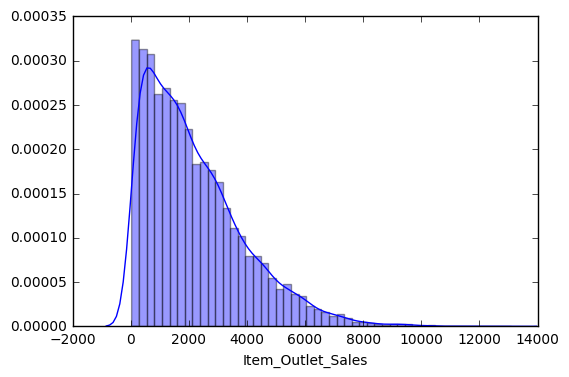

In [157]:
sns.distplot(train.Item_Outlet_Sales)

In [158]:
Sales_log=np.log1p(train.Item_Outlet_Sales)

In [159]:
Sales_log

0       8.225808
1       6.096776
2       7.648868
3       6.597664
4       6.903451
5       6.323658
6       5.842247
7       8.299973
8       6.982490
9       8.457769
10      7.324508
11      7.690813
12      7.371656
13      7.671458
14      7.590057
15      7.344925
16      7.391963
17      6.578415
18      7.742692
19      7.919146
20      8.236443
21      8.310180
22      7.370399
23      5.372439
24      8.313613
25      6.733292
26      6.971931
27      5.736350
28      5.189810
29      4.842896
          ...   
8493    8.461296
8494    7.401761
8495    8.369942
8496    8.220447
8497    7.717830
8498    7.379164
8499    7.998714
8500    7.554082
8501    7.319227
8502    8.013366
8503    8.129740
8504    8.328358
8505    7.658343
8506    8.280423
8507    6.248033
8508    7.859013
8509    6.053924
8510    8.879563
8511    8.344946
8512    7.816191
8513    6.390618
8514    6.152144
8515    7.360287
8516    6.756795
8517    8.191362
8518    7.929984
8519    6.310436
8520    7.0851